## 1. Introduction

 - This project analyzes crime and accident trends in Kerala using publicly available data.
 - The objective is to identify year-wise patterns and major contributing crime categories using exploratory data analysis and visualization.

## 2. Importing Required Libraries

In [1]:
# Pandas is used for data manipulation and Matplotlib for visualization.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

## 3.Loading the Dataset

In [2]:
# The dataset contains crime category-wise case counts for multiple years.
df = pd.read_csv("./kerala criminal cases  - crimes  accidents.csv")

df.head()

,Sl.No,Crime Heads,2016,2017,2018,2019,2020,2021,2022 (Up to Aug)
0,1,Murder,305,305,292,323,306,337,190
1,2,Attempt to commit murder,622,583,672,729,610,606,396
2,3,CH not amounting to murder,132,112,90,93,84,55,52
3,4,Rape,1656,2003,2005,2023,1880,2318,1383
4,5,Kidnapping & abduction,241,293,297,386,307,358,237


## 4. Data Understanding

### 1. Shape of the Dataset

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl.No             69 non-null     int64 
 1   Crime Heads       69 non-null     object
 2   2016              69 non-null     int64 
 3   2017              69 non-null     int64 
 4   2018              69 non-null     int64 
 5   2019              69 non-null     int64 
 6   2020              69 non-null     int64 
 7   2021              69 non-null     int64 
 8   2022 (Up to Aug)  69 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 5.0+ KB


(69, 9)

The dataset contains multiple crime categories recorded across several years.
The shape of the dataset helps understand the overall size and structure of the data.
- Number of rows = 69
- Number of columns = 9 

### 2. Missing Values
Missing value analysis was performed to check data completeness.
The dataset does not contain significant missing values, making it suitable for analysis.

In [4]:
df.isnull().sum()

Sl.No               0
Crime Heads         0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
2022 (Up to Aug)    0
dtype: int64

- no missing values

### 3. Column Names
The dataset includes columns representing crime categories and year-wise case counts.

In [6]:
df.columns

Index(['Sl.No', 'Crime Heads', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

### 4. Number of Crime Heads (VERY IMPORTANT)

In [5]:
# This gives the number of unique crime categories.
# (Optional – to see the names)

print(f'Number of Crime Head : {df["Crime Heads"].nunique()}\n\n Crime Heads List : \n{df["Crime Heads"].unique()}')

Number of Crime Head : 67

 Crime Heads List : 
['Murder' 'Attempt to commit murder' 'CH not amounting to murder' 'Rape'
 'Kidnapping & abduction' 'Dacoity' 'Robbery' 'Burglary' 'Theft' 'Riots'
 'Criminal breach of trust' 'Cheating' 'Counterfeiting' 'Arson' 'Hurt'
 'Dowry Deaths(304(B) IPC)' 'Molestation' 'Sexual harassment'
 'Cruelty by husband or relatives' 'Other IPC Crimes' 'Arms Act'
 'NDPS Act' 'Gambling ACT' 'Abkari ACT'
 'Explosive and Explosive Substance Act' 'Immoral Traffic(P) Act'
 'Railways Act' 'Registration of foreigners Act'
 'Protection of Civil Rights Act' 'Indian Passport Act'
 'Essential Commodities Act' 'Antiquity and art treasure Act'
 'Dowry Prohibition Act' 'Prohibition of Child Marriage Act'
 'Indecent rep. of women Act' 'SC/ST (POA) Act' 'Forest Act'
 'Other SLL Crimes' 'Total Murder (Infanticide and Other)'
 'Section 4 & 6 of PoCSO Act with Sec. 376 IPC' 'Kidnapping and Abduction'
 'Foeticide' 'Abetment of Suicide' 'Exposure and Abandonment'
 'Procuration of 

- The dataset contains multiple unique crime categories, each representing a distinct type of criminal or accident-related case.
- Understanding the number of crime heads helps in category-wise comparison and trend analysis.

## 5. Data Cleaning & Preprocessing

In [7]:
# Drop Sl.No column (identifier, not useful for analysis)
df = df.drop(columns = ["Sl.No"])

# Rename year column for consistency
df = df.rename(columns = {"2022 (Up to Aug)" : "2022"})

df.columns

,Crime Heads,2016,2017,2018,2019,2020,2021,2022
0,Murder,305,305,292,323,306,337,190
1,Attempt to commit murder,622,583,672,729,610,606,396
2,CH not amounting to murder,132,112,90,93,84,55,52
3,Rape,1656,2003,2005,2023,1880,2318,1383
4,Kidnapping & abduction,241,293,297,386,307,358,237


In [8]:
# Convert wide format to long format

df_long = df.melt(
    id_vars = ["Crime Heads"],
    var_name = "Years",
    value_name = "Crime_Counts"
)


df_long = df_long.sort_values(
    by = ["Crime Heads", "Year"]).reset_index(drop = True)

df_long.head()

,Crime Heads,Years,Crime_Counts
0,Murder,2016,305
1,Attempt to commit murder,2016,622
2,CH not amounting to murder,2016,132
3,Rape,2016,1656
4,Kidnapping & abduction,2016,241


The dataset was sorted by crime category and year to maintain chronological order, which helps in accurate time-series analysis and improves readability of the data.

In [9]:
# Convert Year to integer

df_long["Years"] = df_long["Years"].astype("int")
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Crime Heads   483 non-null    object
 1   Years         483 non-null    object
 2   Crime_Counts  483 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.4+ KB


- Data cleaning involved removing the serial number column as it does not contribute to analysis.
- The year column was renamed for consistency.
- The dataset was reshaped from wide format to long format to enable effective time-series and category-wise analysis.

## 6. Exploratory Data Analysis (EDA)
- EDA helps identify patterns, trends, and dominant crime categories.

### Total Crime & Accident Cases Over Years

In [12]:
total_cases = df_long.groupby("Year")["Crime_Counts"].sum().reset_index()

total_cases

,Years,Crime_Counts
0,2016,1060810
1,2017,937161
2,2018,750442
3,2019,672455
4,2020,693885
5,2021,726966
6,2022,384745


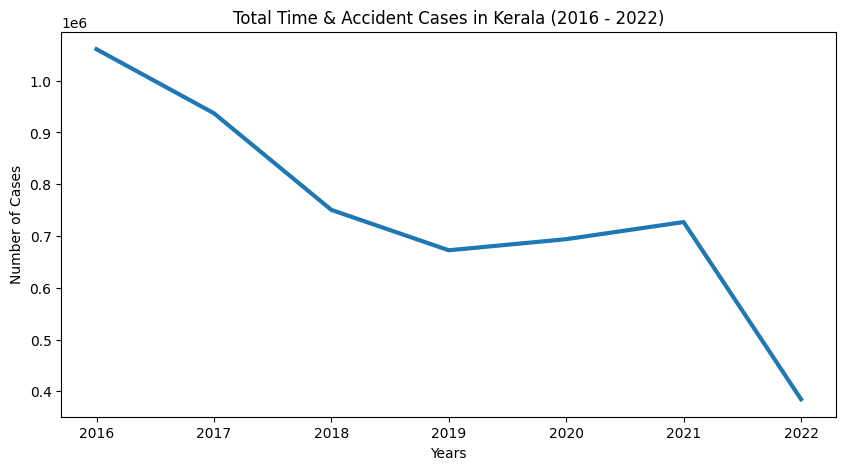

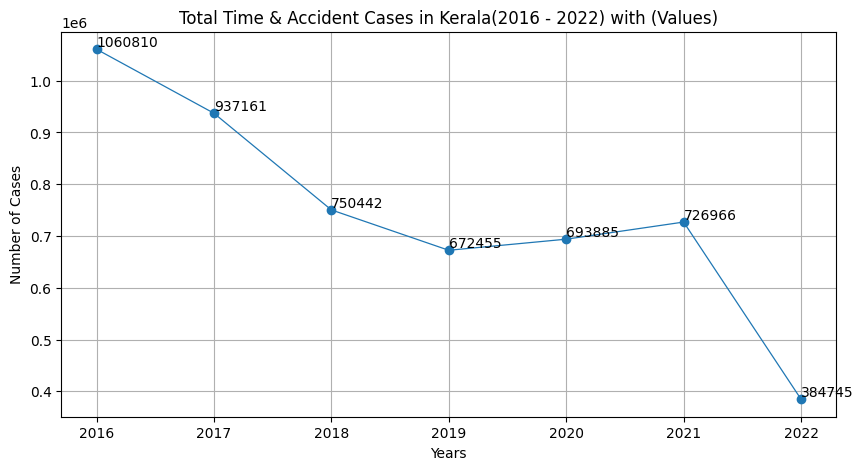

In [78]:
# -------- Graph 1: Trend line only --------
plt.figure(figsize=(10, 5))
plt.plot(total_cases["Year"], total_cases["Crime_Counts"],
    linewidth=3
)

plt.title("Total Time & Accident Cases in Kerala (2016 - 2022)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()


# -------- Graph 2: Line with markers and values --------
plt.figure(figsize=(10, 5))
plt.plot(total_cases["Year"], total_cases["Crime_Counts"],
    marker="o",
    linewidth=0.9
)

# Add value labels to each point
for year, count in zip(total_cases["Year"], total_cases["Crime_Counts"]):
    plt.text(year, count, str(count), #converts the crime count number into a string to display as text on the plot.
        ha="left",
        va="bottom"
    )

plt.title("Total Time & Accident Cases in Kerala(2016 - 2022) with (Values)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

- This line chart shows the overall trend of crime and accident cases in Kerala across years.
- It helps identify periods of increase or decrease in total reported cases.

### Crimes Categories

In [17]:
crimes = df_long.groupby("Crime Heads")["Crime_Counts"].sum().sort_values(ascending = False).reset_index()

crimes

,Crime Heads,Crime_Counts
0,Other SLL Crimes,2060689
1,Other IPC Crimes,988941
2,Cigarettes and Other Tobacco -Section 4,770631
3,Total Injuries in accidents,277560
4,No. of accidents,245853
...,...,...
62,Foeticide,1
63,Protection of Civil Rights Act,1
64,Antiquity and art treasure Act,1
65,Selling Girls for Prostitution,0


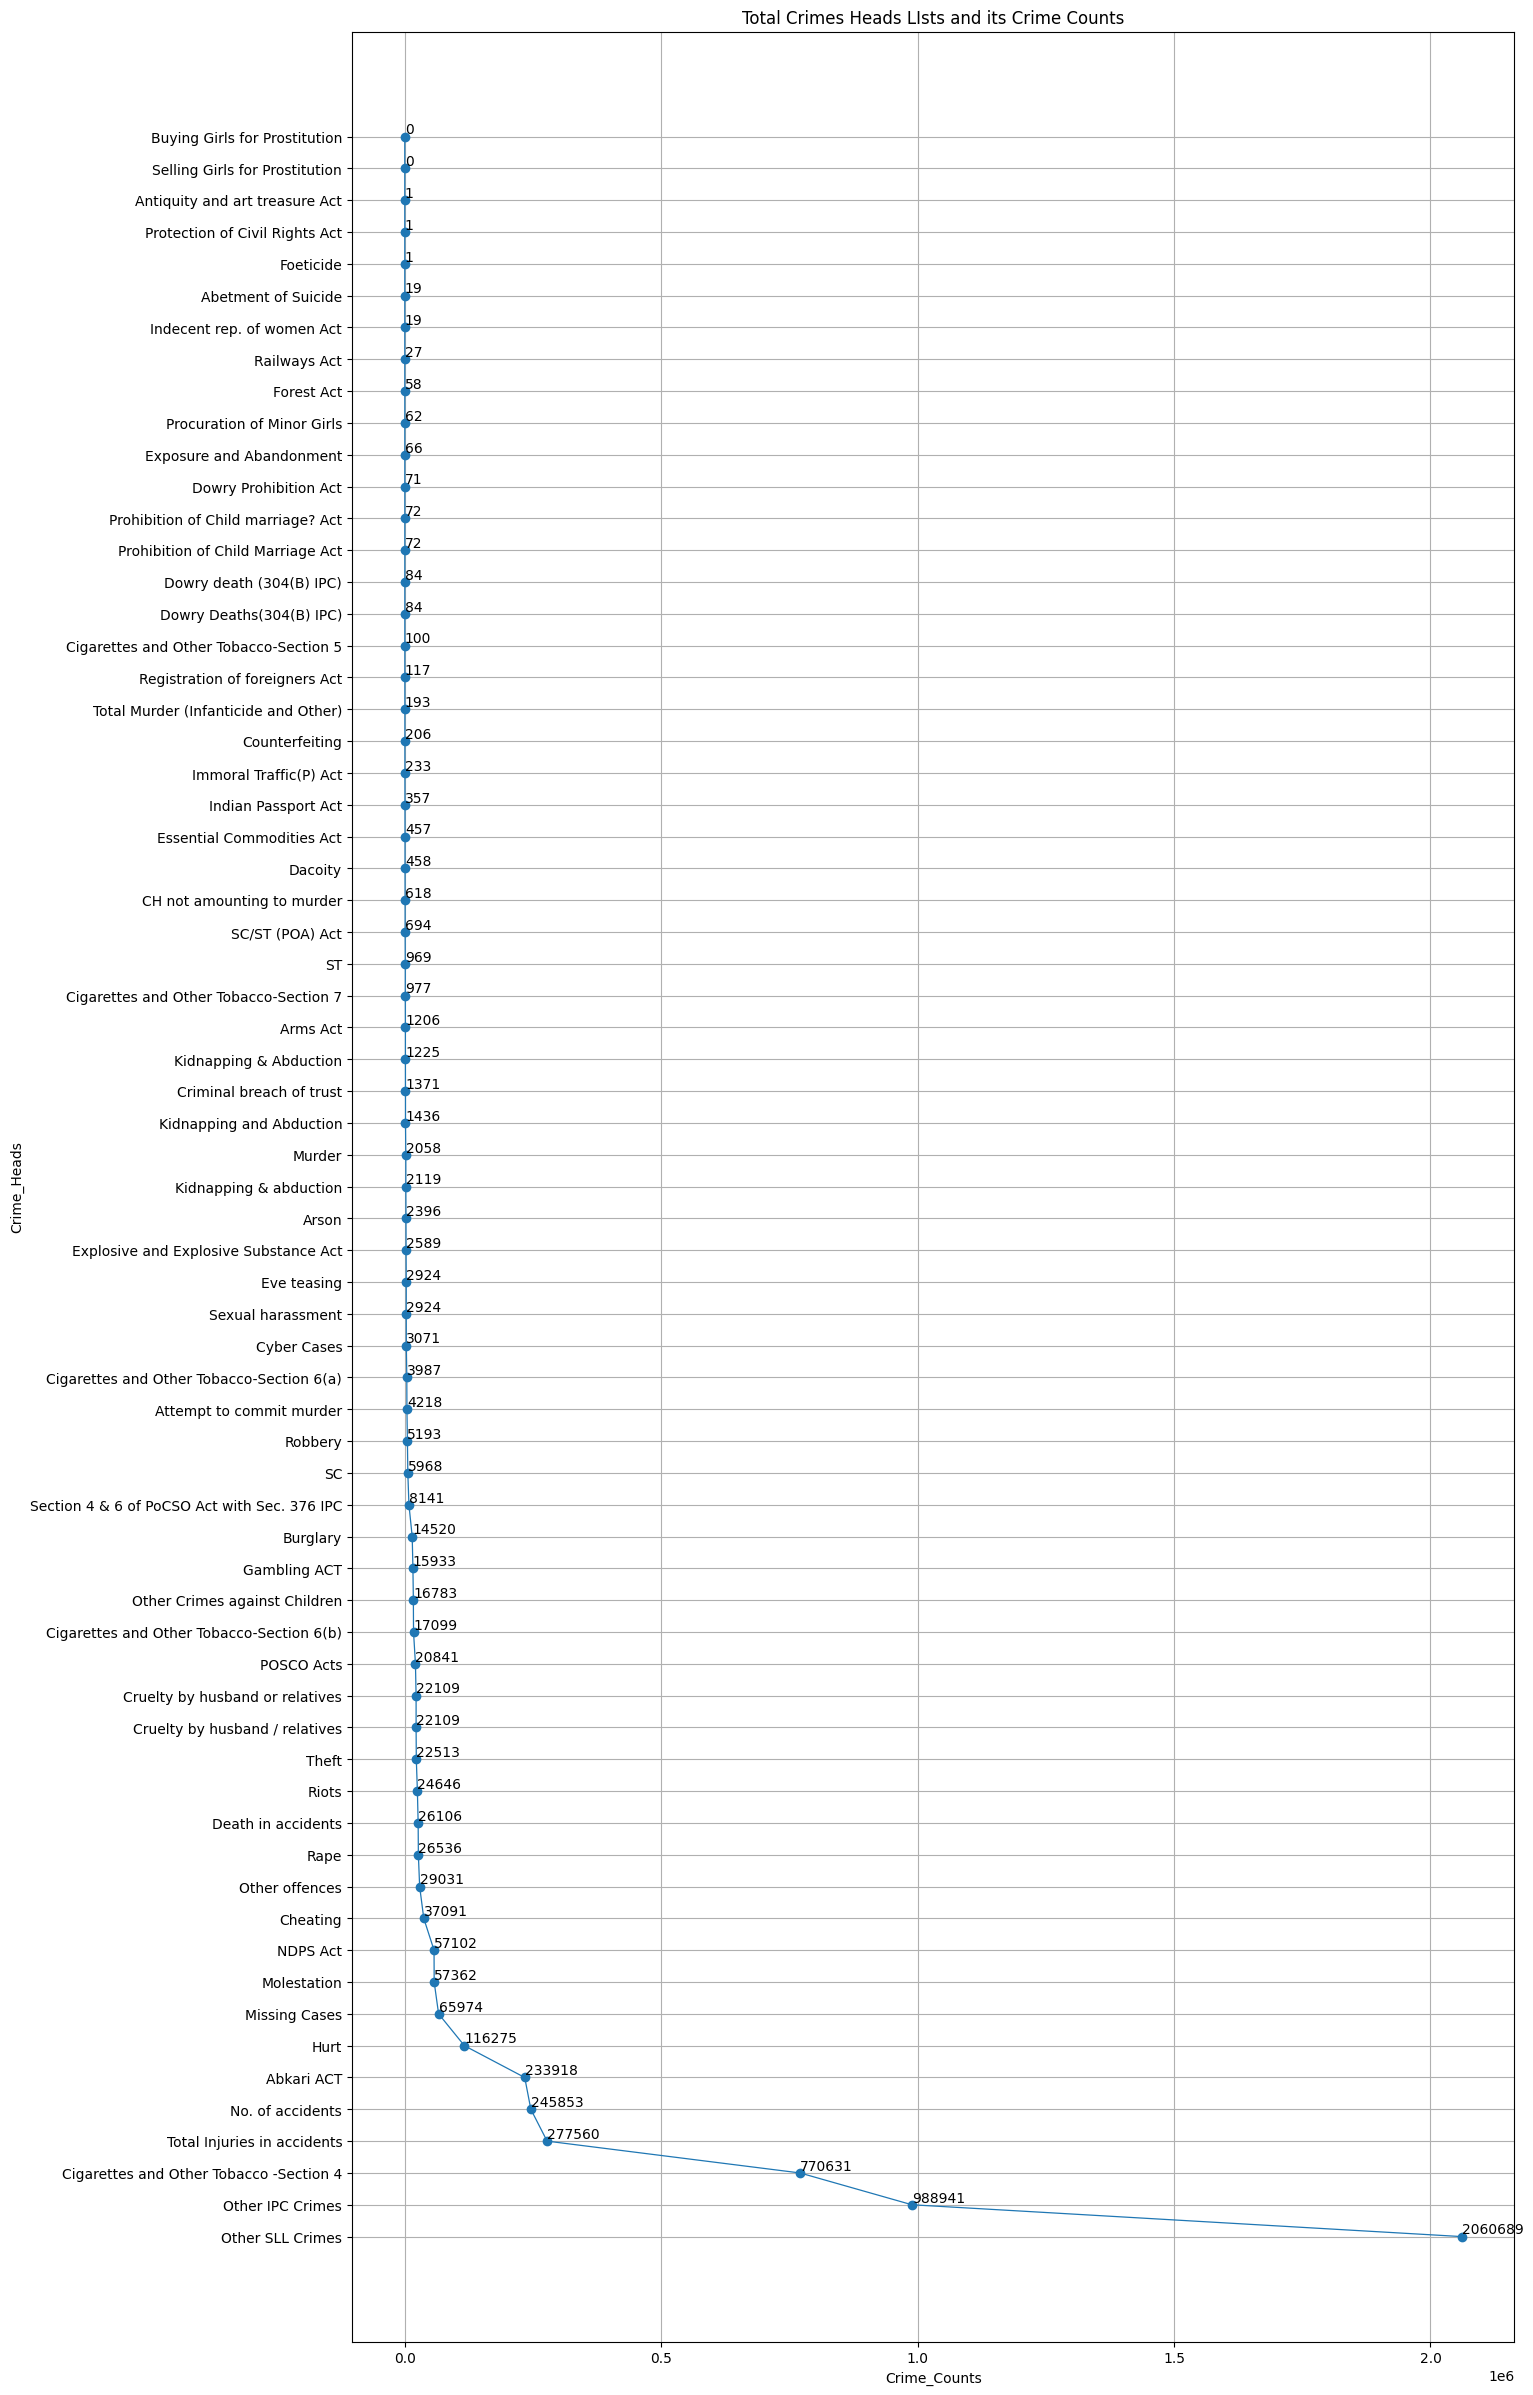

In [20]:
plt.figure(figsize=(15, 30))
plt.plot(crimes["Crime_Counts"], crimes["Crime Heads"],
    marker="o",
    linewidth=0.9
)

# Add value labels to each point
for Crime_Counts, Crime_Heads in zip(crimes["Crime_Counts"], crimes["Crime Heads"]):
    plt.text(Crime_Counts, Crime_Heads, str(Crime_Counts), #converts the crime count number into a string to display as text on the plot.
        ha="left",
        va="bottom"
    )

plt.title("Total Crimes Heads LIsts and its Crime Counts")
plt.xlabel("Crime_Counts")
plt.ylabel("Crime_Heads")
plt.grid(True)
plt.show()

- This line chart shows the overall trend of crimes list and no of cases in Kerala.

### Top Crime Categories

In [19]:
top_crimes = df_long.groupby("Crime Heads")["Crime_Counts"].sum().sort_values(ascending = False).head(6)

top_crimes.reset_index()

,Crime Heads,Crime_Counts
0,Other SLL Crimes,2060689
1,Other IPC Crimes,988941
2,Cigarettes and Other Tobacco -Section 4,770631
3,Total Injuries in accidents,277560
4,No. of accidents,245853
5,Abkari ACT,233918


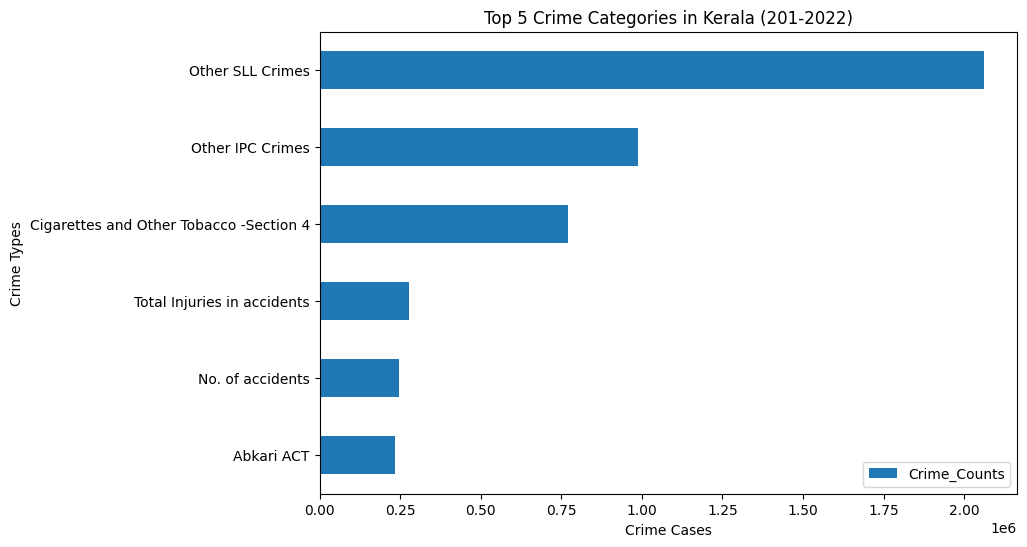

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

top_crimes.plot(kind="barh", x="Crime_Counts", y="Crime Heads", legend=True)

plt.title("Top 5 Crime Categories in Kerala (201-2022)")
plt.xlabel("Crime Cases")
plt.xticks(rotation=0)  # Rotate labels at a more reasonable angle
plt.ylabel("Crime Types")

# REQUIRED to show biggest on top
plt.gca().invert_yaxis()
plt.show()


- This bar chart highlights the top crime categories contributing the highest number of cases over the observed period.
- It helps identify areas requiring focused administrative attention.

### Trend of a Specific Crime Category

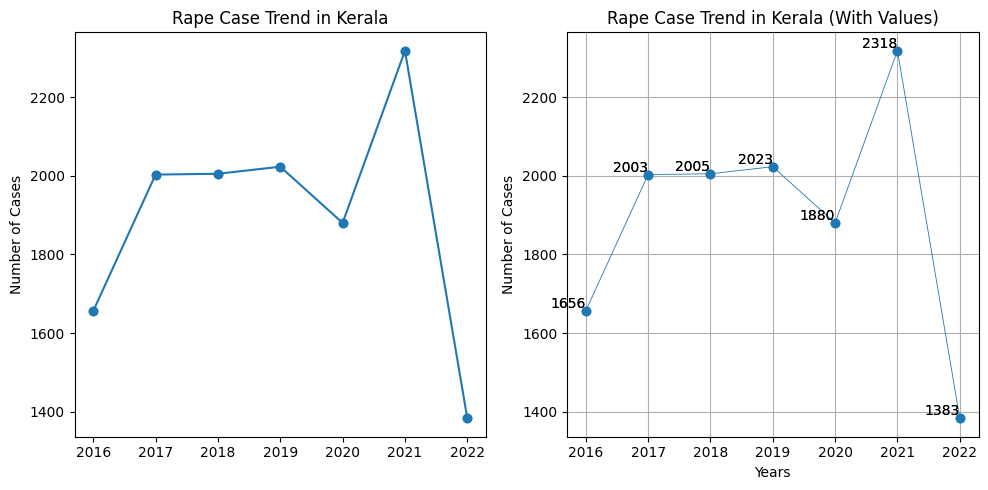

In [77]:
rape_data = df_long[df_long["Crime Heads"]=="Rape"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharex = True)
# ----------------- Plot 1: Simple line plot -----------------
axes[0].plot(
    rape_data["Year"],
    rape_data["Crime_Counts"],
    marker="o"
)

axes[0].set_title("Rape Case Trend in Kerala")
axes[0].set_ylabel("Number of Cases")
axes[0].grid(False)

# ----------------- Plot 2: Line plot with value labels -----------------
axes[1].plot(
    rape_data["Year"],
    rape_data["Crime_Counts"],
    marker="o",
    linewidth=0.6
)

for year, count in zip(rape_data["Year"], rape_data["Crime_Counts"]):
    axes[1].text(
        year, count, str(count),
        ha="right",
        va="bottom"
    )

axes[1].set_title("Rape Case Trend in Kerala (With Values)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Cases")
axes[1].grid(True)

plt.tight_layout()
plt.show()

- This plot shows the year-wise trend of a specific crime category, helping to understand its stability or variation over time.

### Data Visualization – Heatmap

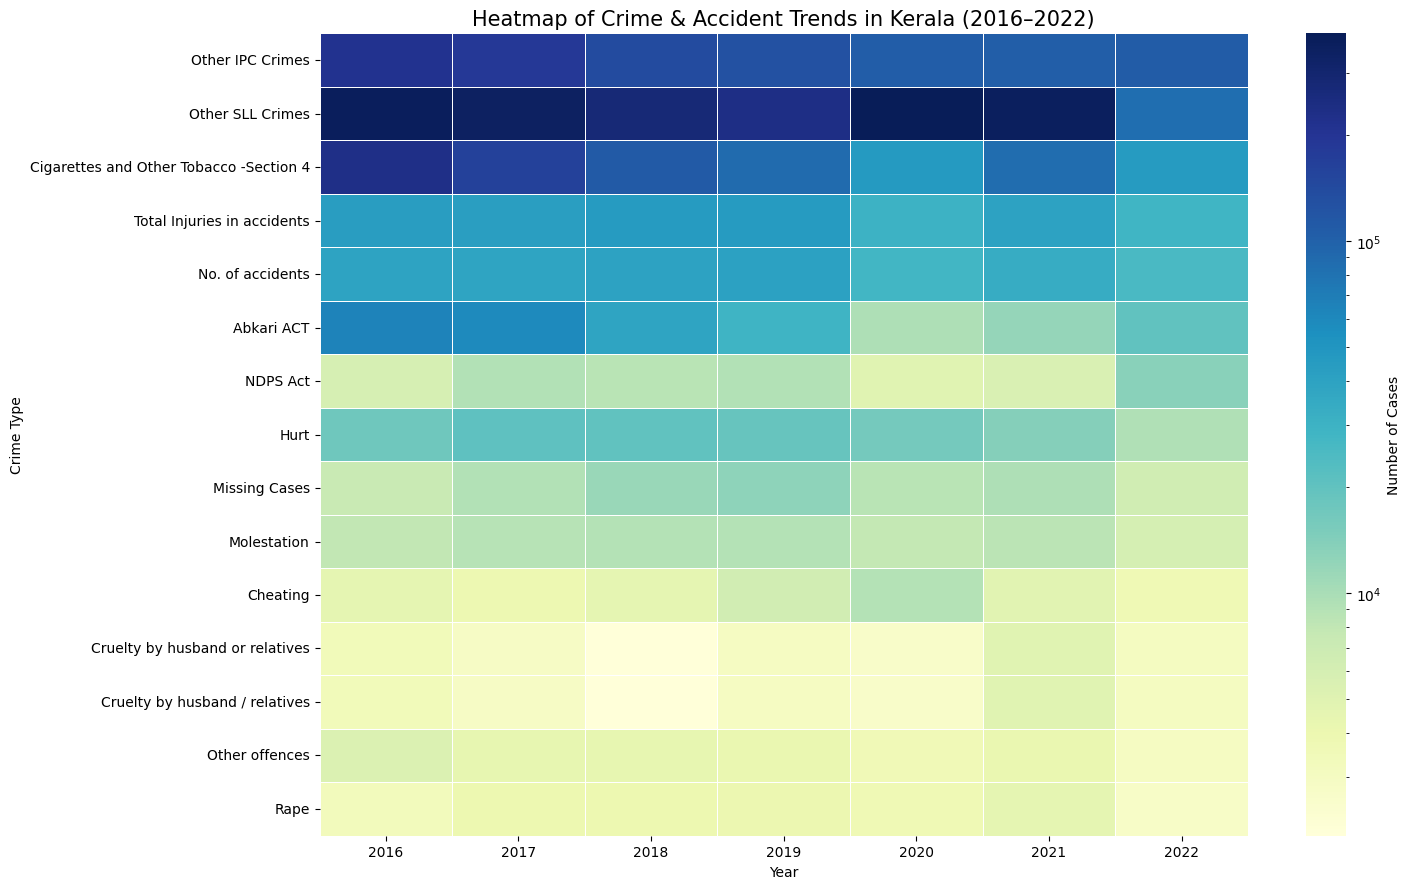

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Pivot table (same as yours)
heatmap_data = df_long.pivot_table(
    index="Crime Heads",
    columns="Year",
    values="Crime_Counts",
    aggfunc="sum"
)

# OPTIONAL but highly recommended: keep only top 15 crime types
heatmap_data = heatmap_data.sort_values(
    by=heatmap_data.columns[-1],
    ascending=False
).head(15)

# Plot seaborn heatmap
plt.figure(figsize=(15, 9))

sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="white",
    norm=colors.LogNorm(),   # handles large value differences
    cbar_kws={"label": "Number of Cases"}
)

plt.title("Heatmap of Crime & Accident Trends in Kerala (2016–2022)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Crime Type")

plt.tight_layout()
plt.show()


- The heatmap visualizes the intensity of top 15 different crime based on 2022 and accident categories across years.
- Darker shades represent higher case counts, making it easy to compare crime patterns and identify consistently high-occurrence categories.

## 7. Insights & Conclusion (FINAL SECTION

- Crime and accident cases in Kerala show noticeable year-wise variation.
- A few crime categories consistently contribute a major share of total cases.
- Serious crimes such as murder exhibit relatively stable trends compared to other categories.
- Heatmap visualization clearly highlights category-wise and temporal intensity differences.
- Such trend analysis can support monitoring, planning, and policy evaluation.